<a href="https://colab.research.google.com/github/Arnabsaha6/Machine-Learning/blob/master/Natural_Gas_Price_Prediction_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: DATA PREPROCESSING/ DATA WRANGLING

IMPORTING LIBRARIES

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

READING THE DATASET

In [0]:
dataset=pd.read_csv(r'data_updated.csv')

In [4]:
dataset

,Date,day,month,year,price
0,07-01-1997,7,1,1997,3.82
1,08-01-1997,8,1,1997,3.80
2,09-01-1997,9,1,1997,3.61
3,10-01-1997,10,1,1997,3.92
4,13-01-1997,13,1,1997,4.00
...,...,...,...,...,...
5558,01-05-2020,1,5,2020,1.71
5559,08-05-2020,8,5,2020,1.84
5560,15-05-2020,15,5,2020,1.63
5561,22-05-2020,22,5,2020,1.78


HANDLING MISSING VALUES

In [5]:
dataset.isnull().any()

Date     False
day      False
month    False
year     False
price     True
dtype: bool

In [0]:
dataset['price'].fillna(dataset['price'].mean(),inplace=True)

In [7]:
dataset.isnull().any()

Date     False
day      False
month    False
year     False
price    False
dtype: bool

IT IS NOT NECESSARY TO APPLY LABEL ENCODING AND ONE HOT ENCODING AS THE DATASET DOES NOT CONTAIN ANY TEXTUAL DATA

SPLIT DATASET INTO INPUTS AND OUTPUTS

In [0]:
x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,4:5].values #outputsrice only


In [9]:
x

array([[   7,    1, 1997],
       [   8,    1, 1997],
       [   9,    1, 1997],
       ...,
       [  15,    5, 2020],
       [  22,    5, 2020],
       [  29,    5, 2020]])

In [10]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [1.63],
       [1.78],
       [1.76]])

SPLIT THE DATA INTO TRAIN AND TEST SETS

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape

(4450, 3)

In [13]:
x_test.shape

(1113, 3)

# STEP 2: DATA ANALYSIS

In [14]:
dataset.describe()

,day,month,year,price
count,5563.000000,5563.000000,5563.000000,5563.000000
mean,15.708790,6.483552,2007.633112,4.307914
std,8.740374,3.413840,6.416366,2.206769
min,1.000000,1.000000,1997.000000,1.050000
25%,8.000000,4.000000,2002.000000,2.760000
50%,16.000000,6.000000,2008.000000,3.690000
75%,23.000000,9.000000,2013.000000,5.430000
max,31.000000,12.000000,2020.000000,18.480000


No handles with labels found to put in legend.


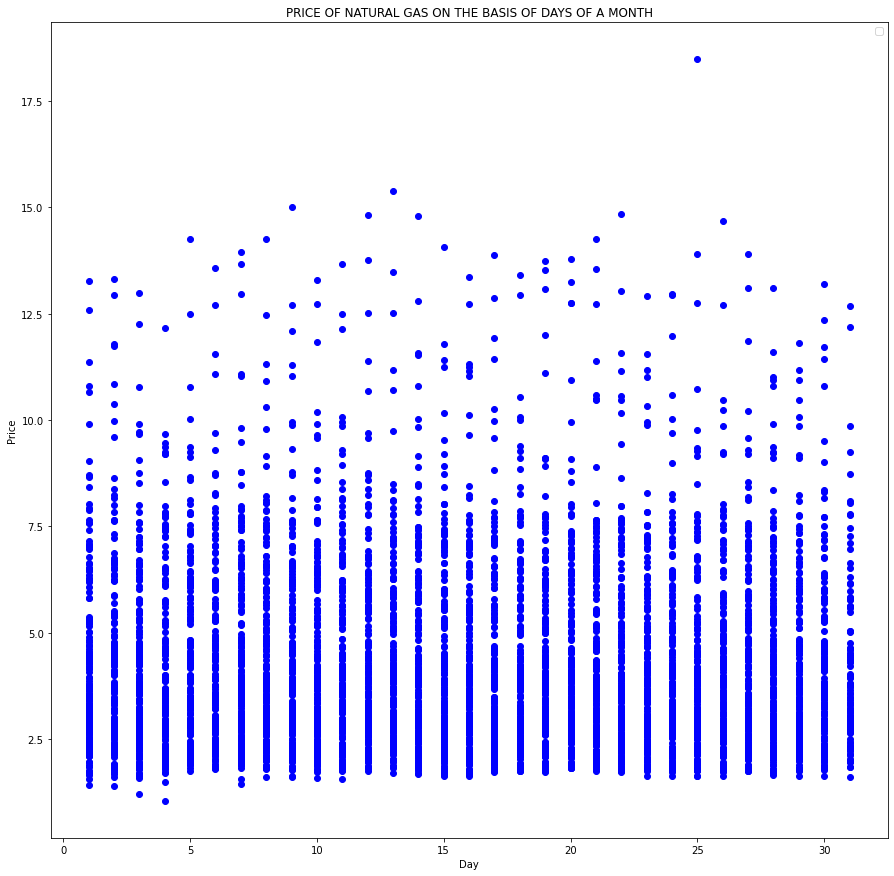

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,15))
plt.scatter(dataset['day'],dataset['price'],color='blue')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

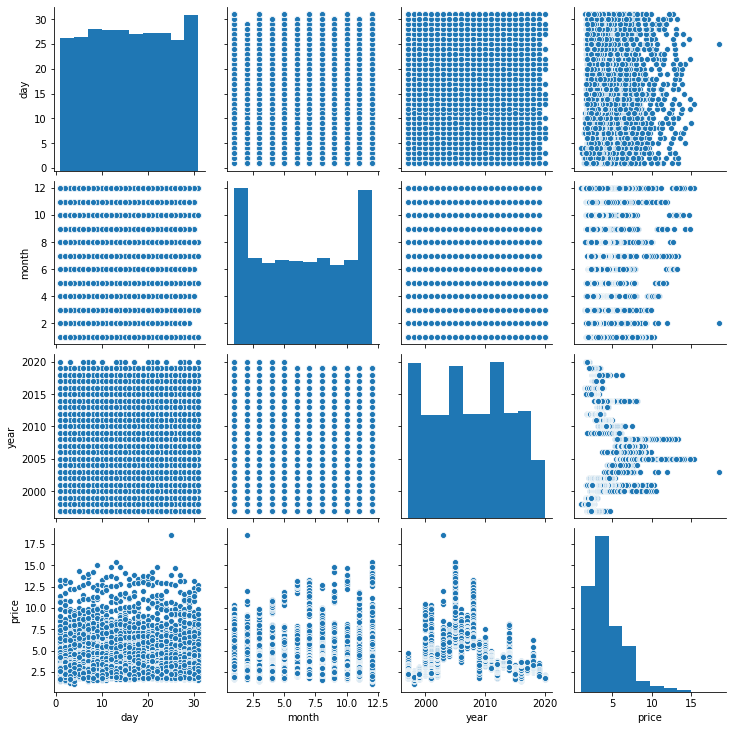

In [44]:
sns.pairplot(dataset)
plt.show()

No handles with labels found to put in legend.


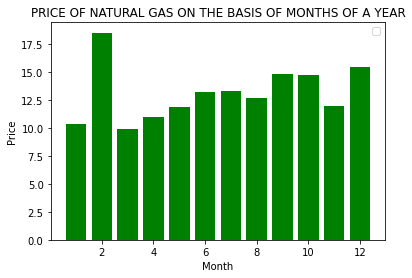

In [16]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


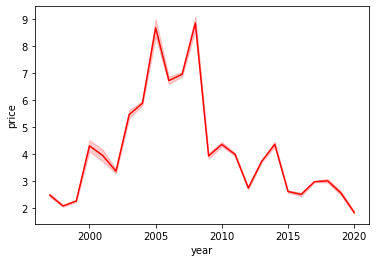

In [17]:
import seaborn as sns
sns.lineplot(x='year',y='price',data=dataset,color='red')

No handles with labels found to put in legend.


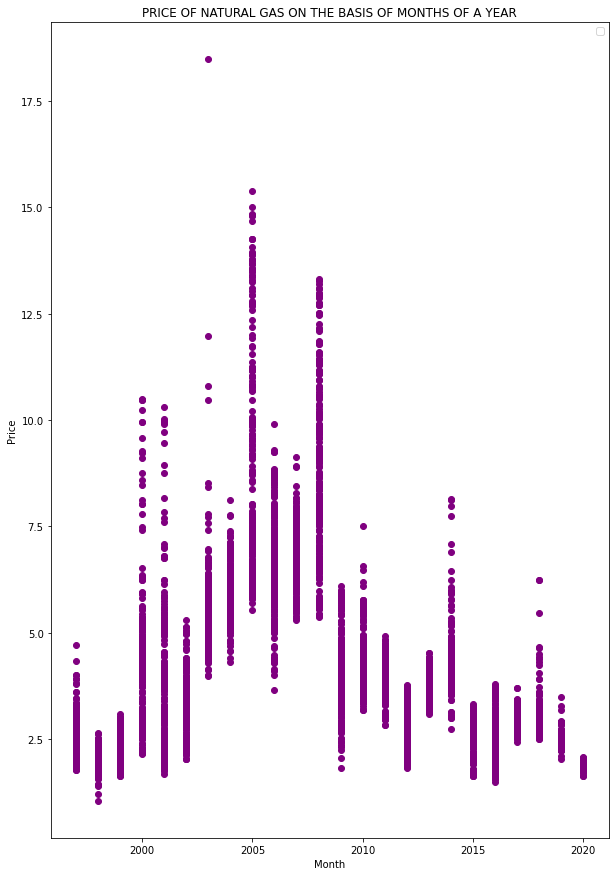

In [18]:
fig=plt.figure(figsize=(10,15))
plt.scatter(dataset['year'],dataset['price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

# STEP 3: BUILDING AND TESTING THE MODEL

MULTILINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=mlr.predict(x_test)

In [21]:
y_pred

array([[4.18566224],
       [4.40234685],
       [4.51063239],
       ...,
       [3.99989922],
       [4.49458949],
       [3.97617388]])

In [22]:
y_test

array([[ 4.6 ],
       [13.41],
       [ 5.55],
       ...,
       [ 1.61],
       [ 7.7 ],
       [ 3.1 ]])

In [0]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [24]:
accuracy

0.006791562606344281

Note: The accuracy obtained using the Multilinear Regression Algorithm is very low...Therefore we will not use this algorithm

DECISION TREE REGRESSOR

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=3,criterion='mse',max_depth=10)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [0]:
import pickle
pickle.dump(dtr,open('pricenew1.pkl','wb'))

PREDICTION

In [0]:
dtrpred=dtr.predict(x_test)

In [28]:
dtrpred

array([ 4.5325    , 12.47307692,  5.19111111, ...,  1.545     ,
        7.51666667,  3.15277778])

In [29]:
y_test

array([[ 4.6 ],
       [13.41],
       [ 5.55],
       ...,
       [ 1.61],
       [ 7.7 ],
       [ 3.1 ]])

ACCURACY EVALUATION

In [0]:
from sklearn.metrics import r2_score
dtraccuracy=r2_score(y_test,dtrpred)

In [31]:
dtraccuracy

0.9754893219531902

RANDOM VALUE PREDICTION

In [0]:
y_p=dtr.predict([[6,6,2020]])

In [33]:
y_p

array([1.8])

In [34]:
dataset.head()

,Date,day,month,year,price
0,07-01-1997,7,1,1997,3.82
1,08-01-1997,8,1,1997,3.80
2,09-01-1997,9,1,1997,3.61
3,10-01-1997,10,1,1997,3.92
4,13-01-1997,13,1,1997,4.00


In [0]:
y_p=dtr.predict([[7,1,1997]])

In [36]:
y_p

array([3.82])

In [0]:
y_p=dtr.predict([[1,5,2020]])

In [38]:
y_p

array([1.63])

In [0]:
y_p=dtr.predict([[7,7,1999]])

In [40]:
y_p

array([2.246])